# Procesamiento de imágenes

## Histograma

La función `calcHist` en OpenCV se utiliza para calcular el histograma de una imagen. Un histograma es una representación gráfica de la distribución de intensidades de píxeles en una imagen. Es una herramienta útil para el análisis de imágenes, ya que puede ayudar a comprender la distribución de brillo y contraste, entre otros aspectos.

Los parámetros de la función `calcHist` son los siguientes:

```python
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

- `images`: Este es el conjunto de imágenes para el cual se calculan los histogramas. Deben estar en formato de lista, por ejemplo `[image]`.

- `channels`: Es una lista de índices, donde cada índice corresponde a un canal para el cual se calculará el histograma. Por ejemplo, si quieres calcular el histograma de una imagen en escala de grises, pasarías `[0]`. Para una imagen BGR, pasarías `[0]`, `[1]` o `[2]` para calcular el histograma de los canales azul, verde o rojo respectivamente.

- `mask`: Una imagen de máscara para calcular el histograma de una región específica de la imagen. Si quieres calcular el histograma de toda la imagen, este parámetro debería ser `None`.

- `histSize`: Este parámetro representa el número de bins en el histograma. Por ejemplo, `[256]` indica que el histograma debe tener 256 bins.

- `ranges`: Es el rango de valores posibles de los píxeles. Para imágenes en escala de grises, este rango es generalmente `[0, 255]` (para abarcar todos los posibles valores de 8 bits).

- `hist`: Es el resultado, el histograma calculado.

- `accumulate`: Un flag que indica si el histograma se debe acumular. Si es `False`, el histograma se limpia al principio de la llamada.

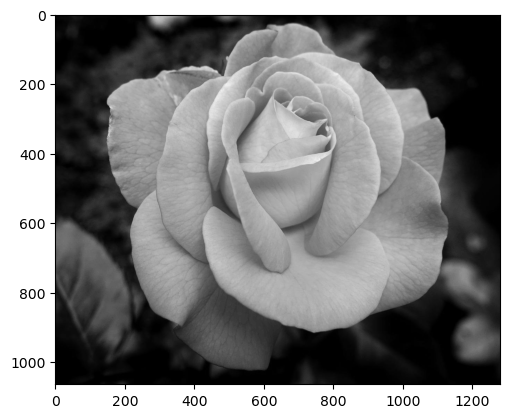

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("flor.jpeg")
image_BW = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_BW, cmap='gray')

<BarContainer object of 32 artists>

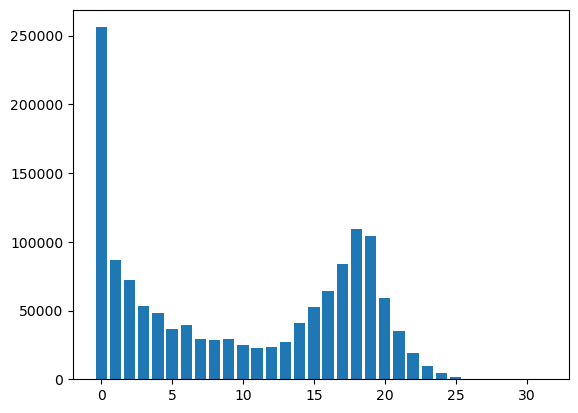

In [3]:
# Histogram
bins = 32
hist = cv2.calcHist([image_BW], [0], None, [bins], [0, 255])
plt.bar(np.arange(bins), hist[:, 0])

## Zonas de movimiento

Podemos detectar en qué zonas de la imagen hay cambios mediante la substracción de imágenes (imagen actual - imagen de fondo).

|<img src="fot1.png">|<img src="fot2.png">|
|--|--|




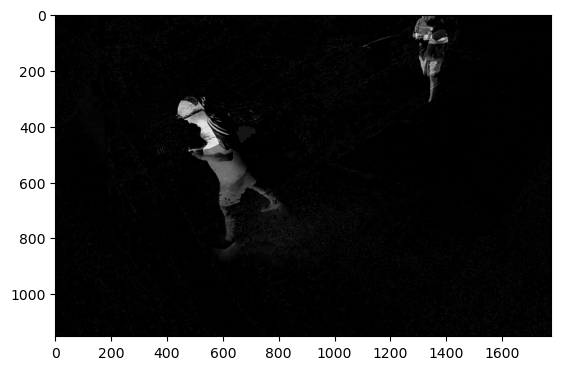

In [4]:
import cv2
import numpy as np
   
# path to input images are specified and 
# images are loaded with imread command
# Load grayscale images
image1 = cv2.imread('fot1.png', 0)
image2 = cv2.imread('fot2.png', 0)
 
sub = cv2.subtract(image1, image2)
 
# plt.imshow(image1, cmap='gray')
plt.imshow(sub, cmap='gray')


¿Qué zonas son realmente nuevas y qué zonas son solamento ruido en la imagen?

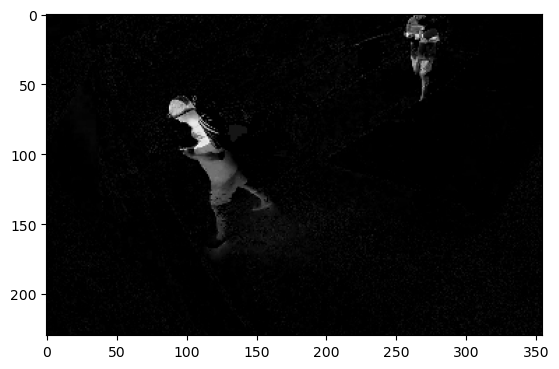

In [5]:
small_image = cv2.resize(sub, (0, 0), fx = 0.2, fy = 0.2)
plt.imshow(small_image, cmap='gray')
plt.savefig('small_image_noise.png')

<BarContainer object of 32 artists>

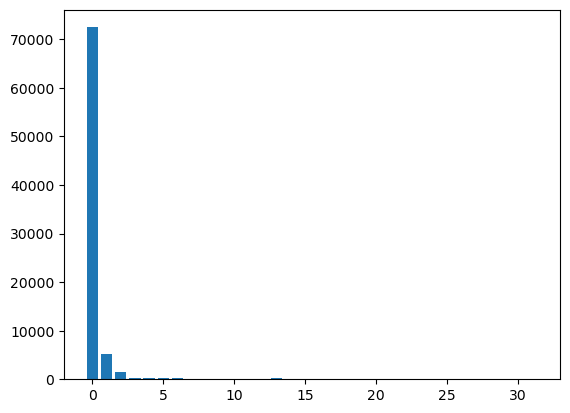

In [6]:
bins = 32
hist = cv2.calcHist([small_image], [0], None, [bins], [0, 255])
plt.bar(np.arange(bins), hist[:, 0])

In [7]:
print(np.max(small_image))
print(np.min(small_image))

249
0


## Umbralizado

El umbralizado de imágenes es una técnica que se utiliza para separar objetos dentro de una imagen en función de la intensidad de los píxeles. En términos simples, se trata de convertir una imagen en escala de grises a una imagen binaria, donde los píxeles pueden tener uno de dos valores posibles, generalmente 0 o 255 (blanco o negro).

### ¿Cómo Funciona?

1. **Selección de un Umbral**: El primer paso en el umbralizado es seleccionar un valor de umbral. Este umbral determinará cómo se clasifican los píxeles.

2. **Aplicación del Umbral**: Después de seleccionar un valor de umbral, se aplica a cada píxel de la imagen de la siguiente manera:
   - Si la intensidad del píxel es menor (o menor o igual, dependiendo de la implementación) que el valor de umbral, el píxel se establece en negro (intensidad 0).
   - Si la intensidad del píxel es mayor que el valor de umbral, el píxel se establece en blanco (intensidad 255).

### Aplicaciones

El umbralizado se utiliza en una variedad de aplicaciones, como:
- Separación de objetos del fondo.
- Preprocesamiento antes de la segmentación de imágenes.
- Reducción de la complejidad visual para aumentar el rendimiento de los algoritmos de visión por computador.
- Extracción de características relevantes de una imagen.

En OpenCV, puedes utilizar la función `cv2.threshold` para aplicar umbralizado a una imagen.

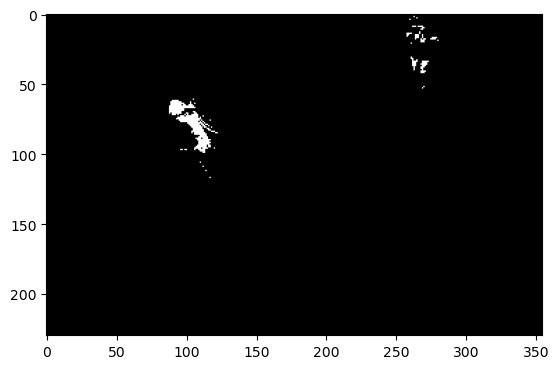

In [8]:
th = np.max(small_image) * 0.5
ret, thresh1 = cv2.threshold(small_image, th, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')


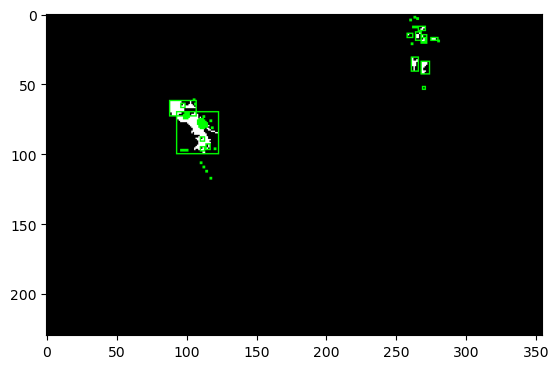

In [9]:
# find the contours
contours, _ = cv2.findContours(thresh1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(cnt)
    # draw a green rectangle to visualize the bounding rect
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

plt.imshow(img, cmap='gray')


-----

### Ejercicios

1. Filtra las regiones que sean mayores de un cierto tamaño.
2. Promedia las imágenes del vídeo para obtener un fondo sin coches.
3. Cuenta el número de coches que pasan por la carretera.
4. Detecta si se produce algún accidente.

